### MATH2504 S2, 2022, BigHW Submission 
### Submission form IV of IV 

Student #1 name: Limao Chang

Student #1 ID: 46978554

Student #2 name: Tiarne Graves

Student #2 ID: 46973081

GitHub repo: https://github.com/LimaoC/Limao-Chang__Tiarne-Graves-2504-2022-BigHW

---

**Note: It is expected that this notebook be runnable in the sense that the marker can select "Restart & Run All" and all code cells of solutions will execute. This requires not to have name clashes between solutions.**

---

In [4]:
# All needed packages for this notebook
using LinearAlgebra
using Plots
using StatsBase
using Measures
using DifferentialEquations

# Solution to [Question 13](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q13)

13a:

In [ ]:
using Calculus, Plots

"""
Returns the absolute relative error between the forward difference scheme
estimation of the function f and the analytic derivative f_der.
"""
function forward_diff_error(f::Function, f_der::Function, x::Number, h::Number)::Number
    forward_diff = (f(x + h) - f(x)) / h
    return abs(forward_diff - f_der(x)) / abs(f_der(x))
end

"""
Returns the absolute relative error between the central difference scheme
estimation of the function f and the analytic derivative f_der.
"""
function central_diff_error(f::Function, f_der::Function, x::Number, h::Number)::Number
    central_diff = (f(x + h/2) - f(x - h/2)) / h
    return abs(central_diff - f_der(x)) / abs(f_der(x))
end

# each function and their analytic derivatives
f1(x::Number) = sin(x^2)
f1_der(x::Number) = 2x*cos(x^2)
f2(x::Number) = MathConstants.e^x
f2_der(x::Number) = MathConstants.e^x
f3(x::Number) = atan(x)/(1 + MathConstants.e^(-x^2))
f3_der(x::Number) = 1/((1 + x^2)*(1 + MathConstants.e^(-x^2))) + (2x * MathConstants.e^(-x^2) * atan(x))/(1 + MathConstants.e^(-x^2))^2

# the x values at which the numerical derivatives are evaluated for each function
f1_x = 1/2
f2_x = 1
f3_x = 2

plot_labels = ["f1 = sin(x²), x = $f1_x" "f2 = eˣ, x = $f2_x" "f3 = atan(x)/(1 + e^(-x²)), x = $f3_x"]

h_range = 10 .^ (-14:0.01:-2)

forward_errors = [
    forward_diff_error.(f1, f1_der, f1_x, h_range),
    forward_diff_error.(f2, f2_der, f2_x, h_range),
    forward_diff_error.(f3, f3_der, f3_x, h_range),
]
central_errors = [
    central_diff_error.(f1, f1_der, f1_x, h_range),
    central_diff_error.(f2, f2_der, f2_x, h_range),
    central_diff_error.(f3, f3_der, f3_x, h_range),
]
display(plot(h_range,
        forward_errors,
        xaxis=:log,
        yaxis=:log,
        xlabel="h",
        ylabel="Absolute relative error",
        title="Forward Difference Scheme Error",
        labels=plot_labels
))
display(plot(
        h_range,
        central_errors,
        xaxis=:log,
        yaxis=:log,
        xlabel="h",
        ylabel="Absolute relative error",
        title="Central Difference Scheme Error",
        labels=plot_labels
))

println("--- Forward Difference Scheme Error ---")
for i in 1:3
    (optimal_h_error, optimal_h_index) = findmin(forward_errors[i])
    optimal_h = h_range[optimal_h_index]
    println("Optimal h for f$i is ≈ $optimal_h with absolute " *
            "relative error ≈ $optimal_h_error.")
end
println("--- Central Difference Scheme Error ---")
for i in 1:3
    (optimal_h_error, optimal_h_index) = findmin(central_errors[i])
    optimal_h = h_range[optimal_h_index]
    println("Optimal h for f$i is ≈ $optimal_h with absolute " *
            "relative error ≈ $optimal_h_error.")
end

13b:

The Jacobian of the softmax function $S$ is, by definition, given by
$$J_{ij} = \frac{\partial S_i}{\partial z_j}.$$

### Forward Difference Scheme

The partial derivative of $S$ with respect to $z_j$, where $j \in (1, \dots, K)$, can be approximated by the forward difference scheme like so:
$$S_{z_j}(\mathbf{z})_i = \frac{S(z_1, \dots, z_j + h, \dots, z_K) - S(\mathbf{z})}{h} = J_{ij}.$$

Since there are $K$ partial derivatives ($S_{z_1}, \dots, S_{z_K}$), we evaluate $K$ of these partial derivatives. Each partial derivative has 2 softmax evaluations, but $S(\mathbf{z})$ is common to all the partial derivatives, so we only require $K + 1$ softmax evaluations.

### Central Difference Scheme

The partial derivative of $S$ with respect to $z_j$, where $j \in (1, \dots, K)$, can be approximated by the central difference scheme like so:
$$S_{z_j}(\mathbf{z})_i = \frac{S(z_1, \dots, z_j + h/2, \dots, z_K) - S(z_1, \dots, z_j - h/2, \dots, z_K)}{h} = J_{ij}.$$

Once again, we evaluate $K$ of these partial derivatives. However, there are no common softmax evaluations between the partial derivatives, so each partial derivative has two softmax evaluations. In total, we require $2K$ softmax evaluations.

13c:

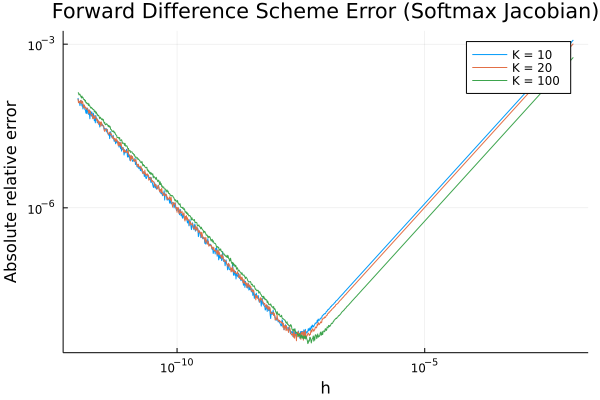

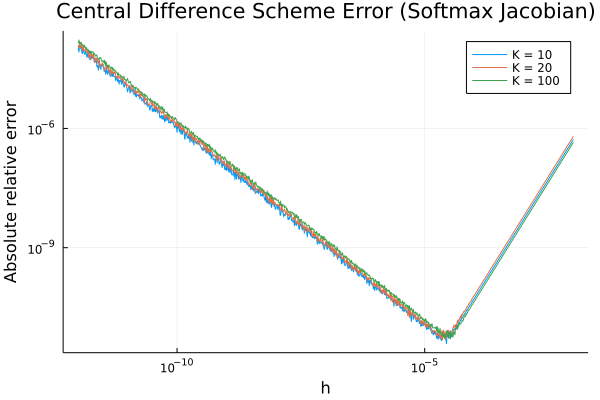

--- Forward Difference Scheme Error ---
Optimal h for K = 10 is ≈ 3.0199517204020194e-8 with absolute relative error ≈ 4.042387822718802e-9.
Optimal h for K = 20 is ≈ 2.5703957827688646e-8 with absolute relative error ≈ 3.6493946634416587e-9.
Optimal h for K = 100 is ≈ 4.3651583224016566e-8 with absolute relative error ≈ 3.2350123549055796e-9.
--- Central Difference Scheme Error ---
Optimal h for K = 10 is ≈ 2.754228703338169e-5 with absolute relative error ≈ 3.87477302190004e-12.
Optimal h for K = 20 is ≈ 2.290867652767775e-5 with absolute relative error ≈ 4.818035570232006e-12.
Optimal h for K = 100 is ≈ 3.3113112148259076e-5 with absolute relative error ≈ 5.15975015768019e-12.


In [2]:
softmax(z) = exp.(z) / sum(exp.(z))

"""
Returns the Jacobian of the softmax function for the given vector z.
"""
function softmax_jacobian(z)
    K = length(z)  # dimension of z
    jacobian = Array{Real}(undef, (K, K))
    S = softmax(z)
    
    for i in 1:K
        for j in 1:K
            if i == j
                jacobian[i, j] = S[i] * (1 - S[i])
            else
                jacobian[i, j] = -S[i] * S[j]
            end
        end
    end
    return jacobian
end

"""
Returns the Jacobian approximation (using the forward difference scheme) of the softmax function
for the given vector z
"""
function softmax_jacobian_forward_diff(z, h)
    K = length(z)  # dimension of z
    jacobian = Array{Real}(undef, (K, K))
    S = softmax(z)
    for j in 1:K
        # create a copy of z in which we add h to the jth dimension
        z_diff = copy(z)
        z_diff[j] += h
        jacobian[:, j] = (softmax(z_diff) - S) / h
    end
    return jacobian
end

"""
Returns the Jacobian approximation (using the central difference scheme) of the softmax function
for the given vector z
"""
function softmax_jacobian_central_diff(z, h)
    K = length(z)  # dimension of z
    jacobian = Array{Real}(undef, (K, K))
    for j in 1:K
        # create two copies of z in which we add and minus h/2 to the ith dimension
        z_diff_minus = copy(z)
        z_diff_plus = copy(z)
        z_diff_minus[j] -= h/2
        z_diff_plus[j] += h/2
        jacobian[:, j] = (softmax(z_diff_plus) - softmax(z_diff_minus)) / h
    end
    return jacobian
end

"""
Returns the error of the Jacobian forward difference scheme approximation.
"""
softmax_jacobian_forward_diff_error(z, h) = norm(softmax_jacobian(z) - softmax_jacobian_forward_diff(z, h))

"""
Returns the error of the Jacobian central difference scheme approximation.
"""
softmax_jacobian_central_diff_error(z, h) = norm(softmax_jacobian(z) - softmax_jacobian_central_diff(z, h))

K_vals = [10, 20, 100]
forward_jacobian_errors = [[], [], []]
central_jacobian_errors = [[], [], []]
h_range = 10 .^ (-12:0.01:-2)
plot_labels = ["K = 10" "K = 20" "K = 100"]

# calculate errors for each scheme
for (index, K) in enumerate(K_vals)
    z = [n^(1/3) for n in 1:K]'
    append!(forward_jacobian_errors[index], softmax_jacobian_forward_diff_error.((z,), h_range))
    append!(central_jacobian_errors[index], softmax_jacobian_central_diff_error.((z,), h_range))
end

display(plot(h_range,
        forward_jacobian_errors,
        xaxis=:log,
        yaxis=:log,
        xlabel="h",
        ylabel="Absolute relative error",
        title="Forward Difference Scheme Error (Softmax Jacobian)",
        labels=plot_labels
))
display(plot(h_range,
        central_jacobian_errors,
        xaxis=:log,
        yaxis=:log,
        xlabel="h",
        ylabel="Absolute relative error",
        title="Central Difference Scheme Error (Softmax Jacobian)",
        labels=plot_labels
))

println("--- Forward Difference Scheme Error ---")
for (index, K) in enumerate(K_vals)
    (optimal_h_error, optimal_h_index) = findmin(forward_jacobian_errors[index])
    optimal_h = h_range[optimal_h_index]
    println("Optimal h for K = $K is ≈ $optimal_h with absolute relative error ≈ $optimal_h_error.")
end

println("--- Central Difference Scheme Error ---")
for (index, K) in enumerate(K_vals)
    (optimal_h_error, optimal_h_index) = findmin(central_jacobian_errors[index])
    optimal_h = h_range[optimal_h_index]
    println("Optimal h for K = $K is ≈ $optimal_h with absolute relative error ≈ $optimal_h_error.")
end

# Solution to [Question 14](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q14)

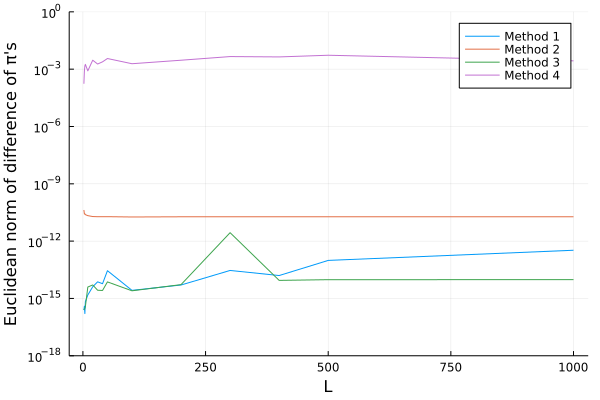

In [5]:
using LinearAlgebra

function structured_P(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Matrix{Float64}
    q = 1 - p - r
    P = diagm(fill(r,L)) + diagm(-1=>fill(q,L-1)) + diagm(1 => fill(p,L-1))
    P[1,1] = 1-p
    P[L,L] = 1-q
    return P
end

structured_π(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64} = begin
    q = 1 - p - r
    [(p/q)^i  for i in 1:L] * (q-p) / p / (1-(p/q)^L) #Explicit expression (birth death)
end;

function compute_π_1(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    # solve π = πP, i.e. Aπ = b where A = I - P and b = 0
    A = (UniformScaling(1) - P)'
    b = zeros(L)
    # impose the condition that the sum of the π's is 1 to get a unique solution
    A = vcat(A, ones(1, L))
    b = vcat(b, 1)
    return A\b
end

function compute_π_2(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int=10^6)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    # pick some initial distribution - doesn't matter what it is, it will converge
    pi_0 = 1/L*ones(L)
    # for large n, π ≈ π₀ * P^n
    pi_limit = vec(pi_0' * P^n)
    return pi_limit
end

function compute_π_3(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    # get eigenvectors and eigenvalues of P
    evals = eigen(P').values
    evecs = eigen(P').vectors
    
    # maximal eigenvalue will be 1, get the corresponding eigenvector
    # for large L, julia thinks the evals have some (very small) complex component - we ignore it
    _, max_eval_index = findmax(real.(evals))
    evec = evecs[:, max_eval_index]
    
    # return scaled version (sum of π's equal to 1) of eigenvector
    return evec / sum(evec)
end

function compute_π_4(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, N::Int=10^6)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    # pick some initial distribution to draw X₀ from - doesn't matter what it is
    pi_0 = 1/L*ones(L)
    # generate X₀
    X = [sample(1:L, Weights(pi_0), 1)...]
    last_X = X[1]
    
    # iterate through N times and generate X₁, ..., X_{N-1}
    for n in 1:N
        # generate X_n using the X_{n-1}th row (i.e. last_X-th row) of P
        append!(X, sample(1:L, Weights(P[last_X, :]), 1))
        last_X = X[end]
    end

    # each πᵢ ≈ 1/N * ∑(I{Xₙ = i}) where I is the indicator function equalling 1 if X[n] == i and 0
    # otherwise
    return [sum([X[n] == i for n in 1:N]) for i in 1:L]/N
end

euclidean_norm_diff(compute_pi_method::Function, L::Int; p::Float64 = 0.45, r::Float64 = 0.01) =
begin
    pi_dist = compute_pi_method(L, p=p, r=r)
    pi_explicit = structured_π(L, p=p, r=r)
    return norm(pi_dist - pi_explicit)
    # P = structured_P(L, p=p, r=r)
    # return abs(norm(pi_dist' * P - pi_dist') - norm(pi_explicit' * P - pi_explicit'))
end

L_vals = [2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]
pi_dists = [[], [], [], []]  # sub vector for each of the different computation methods

for L in L_vals
    append!(pi_dists[1], euclidean_norm_diff(compute_π_1, L))
    append!(pi_dists[2], euclidean_norm_diff(compute_π_2, L))
    append!(pi_dists[3], euclidean_norm_diff(compute_π_3, L))
    append!(pi_dists[4], euclidean_norm_diff(compute_π_4, L))
end    

display(plot(L_vals,
        pi_dists,
        # xaxis=:log,
        yaxis=:log,
        ylims=(1e-18, 1),
        xlabel="L",
        ylabel="Euclidean norm of difference of π's",
        labels=["Method 1" "Method 2" "Method 3" "Method 4"]
))

# Solution to [Question 15](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q15)

#### 15a:

In [1]:
#These four convenience functions extract the state variable from the state vector
#It is assumed the layout of the vector u is u = [v_x, v_y, x, y]
state_v_x(u::Vector{Float64}) = u[1]
state_v_y(u::Vector{Float64}) = u[2]
state_x(u::Vector{Float64}) = u[3]
state_y(u::Vector{Float64}) = u[4]

"""
Computes the RHS for the one body problem. 
"""
function df_dt_one_body(u::Vector{Float64})
    M, G = 1, 1 #We take these constants as normalized. Naturally they would need to be set for physical values.
    r = sqrt(state_x(u)^2 + state_y(u)^2)
    return [-M*G*state_x(u)/r^3, -M*G*state_y(u)/r^3, state_v_x(u), state_v_y(u)]
end;

function plot_solution_position( t::AbstractArray{T}, 
                        u::Vector{Vector{Float64}}; 
                        title::String = "",
                        label::Union{String, Bool} = false) where T
    x, y, v_x, v_y = state_x.(u), state_y.(u), state_v_x.(u), state_v_y.(u)
 
    #"Position"
    r = @. sqrt(x^2 + y^2)
    E = @. 0.5*(v_x^2 + v_y^2) - 1.0/r

    p1 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))
    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")
    
    plot(p1, margin = 10mm,size=(800,400))
end;

function plot_solution_energy( t::AbstractArray{T}, 
                        u::Vector{Vector{Float64}}; 
                        title::String = "",
                        label::Union{String, Bool} = false) where T
    x, y, v_x, v_y = state_x.(u), state_y.(u), state_v_x.(u), state_v_y.(u)
 
    #"Energy"
    r = @. sqrt(x^2 + y^2)
    E = @. 0.5*(v_x^2 + v_y^2) - 1.0/r

    p4 = plot(  t, E, xlabel = "Time", ylabel = "Energy",
                label = label, title = title*" (energy)")
    plot(p4, margin = 10mm,size=(800,400))
end;

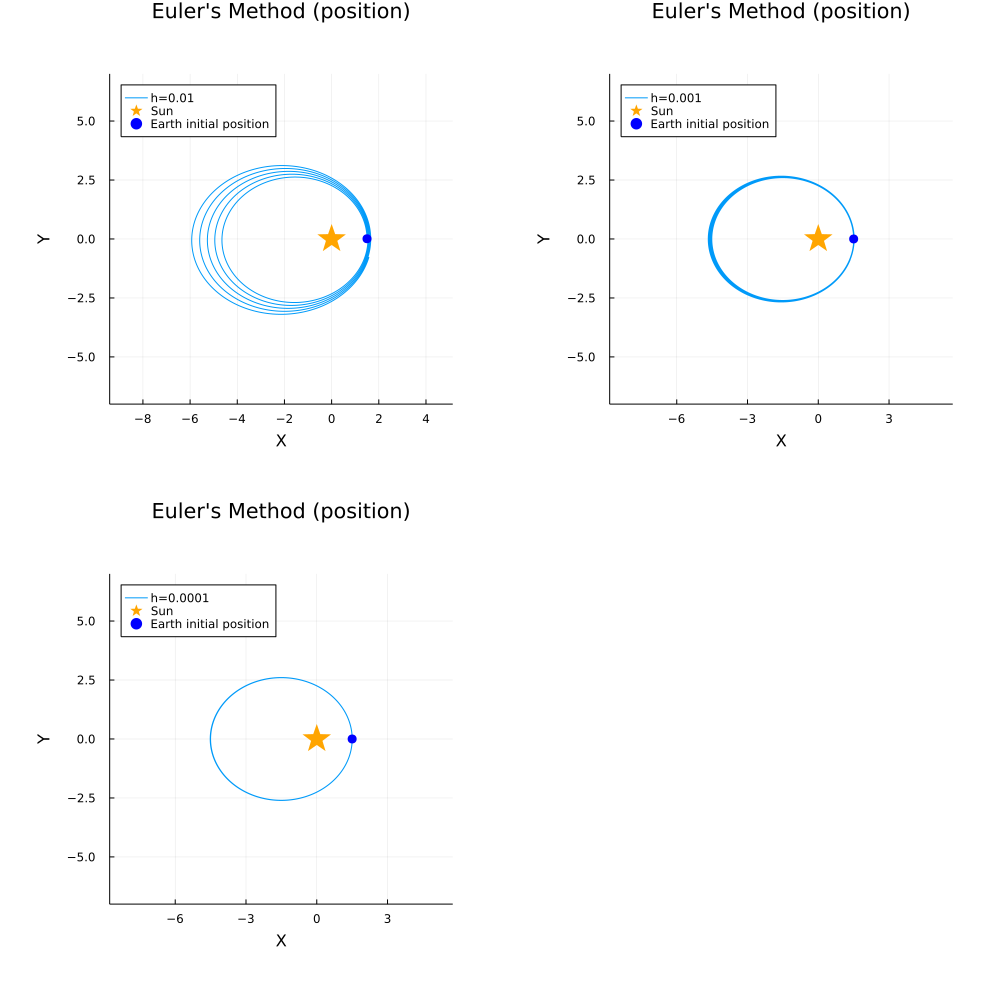

In [5]:
function eulers_method(h::Float64, u::Vector, t_max::Int64)
    u_copy = copy(u)  # avoid modifying the original u vector
    t_range = 0:h:t_max
    num_steps = length(t_range)
    u_array = Array{Vector{Float64}}(undef, num_steps)

    # iteratively calculate euler's method
    for (step, t) in enumerate(t_range)
        u_copy += h * df_dt_one_body(u_copy)
        u_array[step] = u_copy
    end

    # reduce the number of points down to ~5000; keep every ith element in the array where
    # i = num_steps/5000 (truncated to an integer)
    t_range = [t_range[trunc(Int, i)] for i in 1:num_steps/5000:num_steps]
    u_array = [u_array[trunc(Int, i)] for i in 1:num_steps/5000:num_steps]
    
    return t_range, u_array
end

t_max = 200
h1, h2, h3 = 0.01, 0.001, 0.0001
title = "Euler's Method"
u = [0.0, 1.0, 1.5, 0.0]

# get t_range and u_array for each value of h
u_1 = eulers_method(h1, u, t_max)
u_2 = eulers_method(h2, u, t_max)
u_3 = eulers_method(h3, u, t_max)

u_1_pos = plot_solution_position(u_1[1], u_1[2], title=title, label="h=$h1")
u_2_pos = plot_solution_position(u_2[1], u_2[2], title=title, label="h=$h2")
u_3_pos = plot_solution_position(u_3[1], u_3[2], title=title, label="h=$h3")

plot(u_1_pos, u_2_pos, u_3_pos)
plot!(size=(1000,1000))

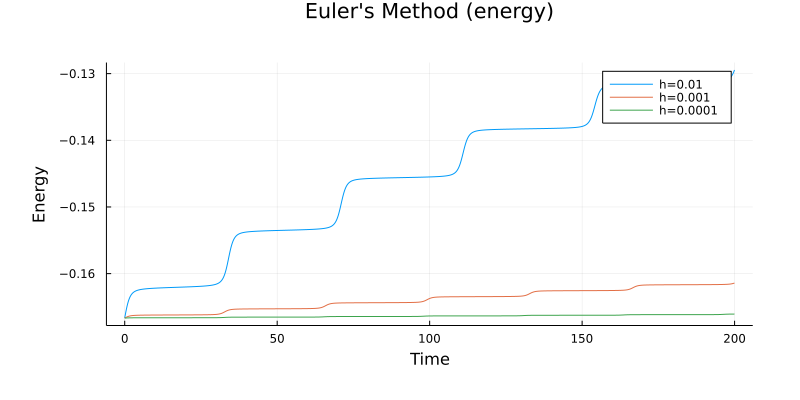

In [7]:
u_1_nrg = plot_solution_energy(u_1[1], u_1[2], title=title, label="h=$h1")
u_2_nrg = plot_solution_energy(u_2[1], u_2[2], title=title, label="h=$h2")
u_3_nrg = plot_solution_energy(u_3[1], u_3[2], title=title, label="h=$h3")

p = plot!(u_1_nrg, u_2_nrg[1][1][:x], u_2_nrg[1][1][:y], labels="h=$h2")
plot!(p, u_3_nrg[1][1][:x], u_3_nrg[1][1][:y], labels="h=$h3")

#### 15b:

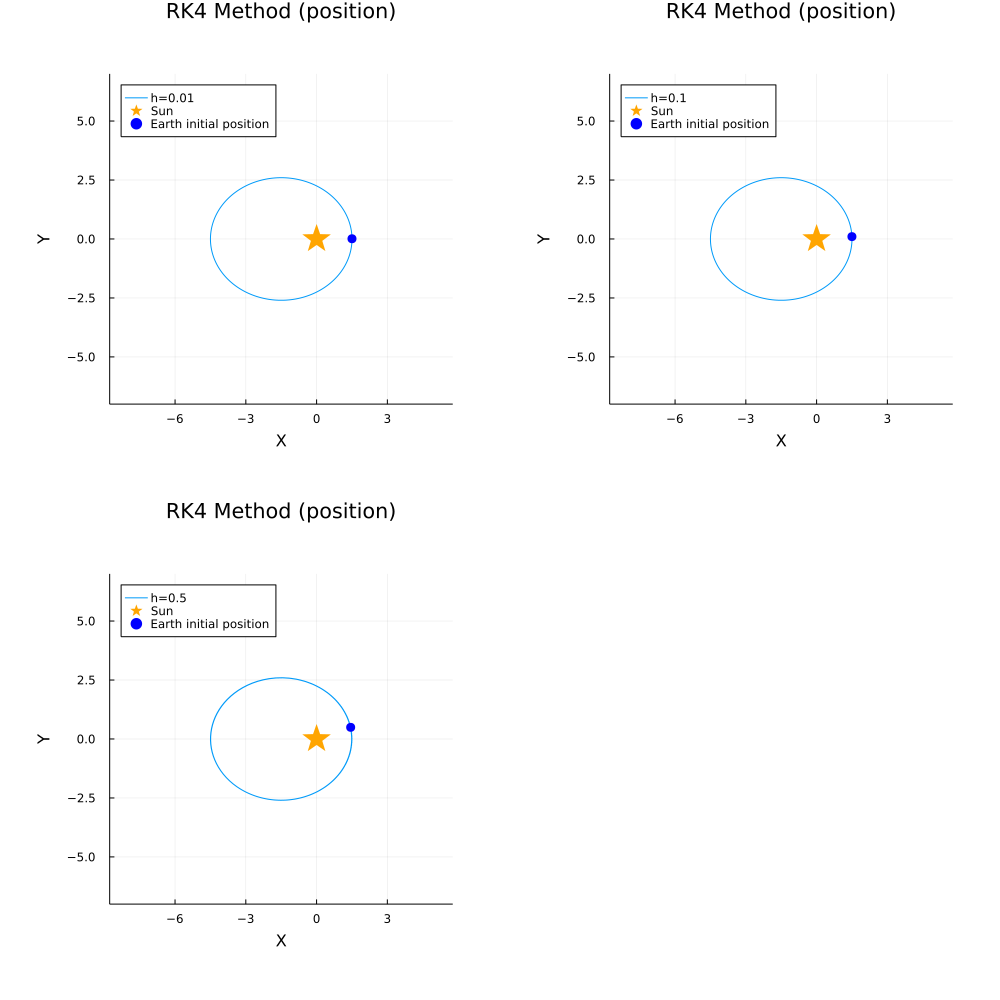

In [8]:
function RK4(h::Float64, u::Vector, t_max::Int64)
    u_copy = copy(u)  # avoid modifying the original u vector
    t_range = 0:h:t_max
    num_steps = length(t_range)
    u_array = Array{Vector{Float64}}(undef, num_steps)

    # iteratively calculate RK4 method
    for (step, t) in enumerate(t_range)
        k1 = df_dt_one_body(u_copy)
        k2 = df_dt_one_body(u_copy + h*k1/2)
        k3 = df_dt_one_body(u_copy + h*k2/2)
        k4 = df_dt_one_body(u_copy + h*k3)

        u_copy += h/6*(k1 + 2k2 + 2k3 + k4)
        u_array[step] = u_copy
    end

    # reduce the number of points down to ~5000; keep every ith element in the array where
    # i = num_steps/5000 (truncated to an integer)
    t_range = [t_range[trunc(Int, i)] for i in 1:num_steps/5000:num_steps]
    u_array = [u_array[trunc(Int, i)] for i in 1:num_steps/5000:num_steps]
    
    return t_range, u_array
end

t_max = 200
h1, h2, h3 = 0.01, 0.1, 0.5
title = "RK4 Method"
u = [0.0, 1.0, 1.5, 0.0]

# get t_range and u_array for each value of h
u_1 = RK4(h1, u, t_max)
u_2 = RK4(h2, u, t_max)
u_3 = RK4(h3, u, t_max)

u_1_pos = plot_solution_position(u_1[1], u_1[2], title=title, label="h=$h1")
u_2_pos = plot_solution_position(u_2[1], u_2[2], title=title, label="h=$h2")
u_3_pos = plot_solution_position(u_3[1], u_3[2], title=title, label="h=$h3")

plot(u_1_pos, u_2_pos, u_3_pos)
plot!(size=(1000,1000))

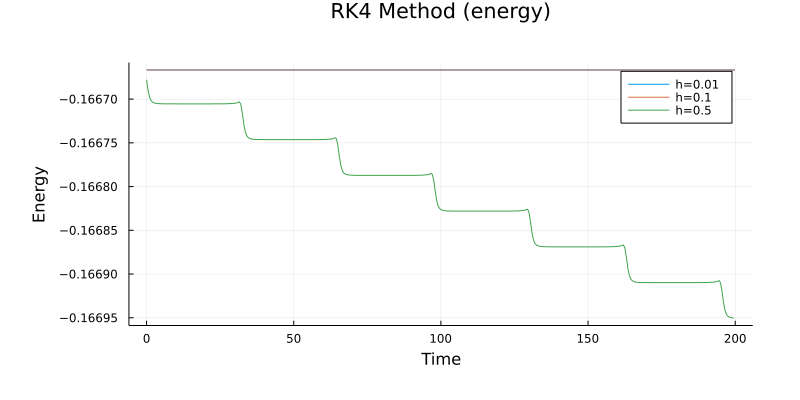

In [9]:
u_1_nrg = plot_solution_energy(u_1[1], u_1[2], title=title, label="h=$h1")
u_2_nrg = plot_solution_energy(u_2[1], u_2[2], title=title, label="h=$h2")
u_3_nrg = plot_solution_energy(u_3[1], u_3[2], title=title, label="h=$h3")

p = plot!(u_1_nrg, u_2_nrg[1][1][:x], u_2_nrg[1][1][:y], labels="h=$h2")
plot!(p, u_3_nrg[1][1][:x], u_3_nrg[1][1][:y], labels="h=$h3")

#### 15c:

The two methods differ in their calculation of the `u` vector for the next time step. Euler's method only requires one call of `df_dt_one_body()` in each time step, whereas the RK4 method requires four different calls of `df_dt_one_body()` in each time step, so Euler's method is more efficient. 

The energy plot for Euler's method reveals that the total energy is not kept constant as required, and the discrepancy grows larger over time. From the graph, it appears that smaller values of `h` will yield smaller discrepancies (best trajectory given by `h = 0.0001`). The energy plot for RK4's method reveals that the total energy is not kept constant for `h = 0.5`, but it is for `h = 0.01` and `h = 0.01`, up to a `t_max` of 200. Similarly, smaller values of `h` are yielding smaller discrepancies (best trajectory given by `h = 0.01`).

#### 15d:

From the discussion in 15c, we can conclude that, of the 6 trajectories above, the worst trajectory is given by Euler's method with `h = 0.01` and the best trajectory is given by RK4's method with `h = 0.01`.
Gif below:

![link](graph.gif)

┌ Info: Saved animation to 
│   fn = /home/limao/GitHub/LimaoC/MATH2504-BigHW/notebooks/graph.gif
└ @ Plots /home/limao/.julia/packages/Plots/lW9ll/src/animation.jl:137


Plots.AnimatedGif("/home/limao/GitHub/LimaoC/MATH2504-BigHW/notebooks/graph.gif")
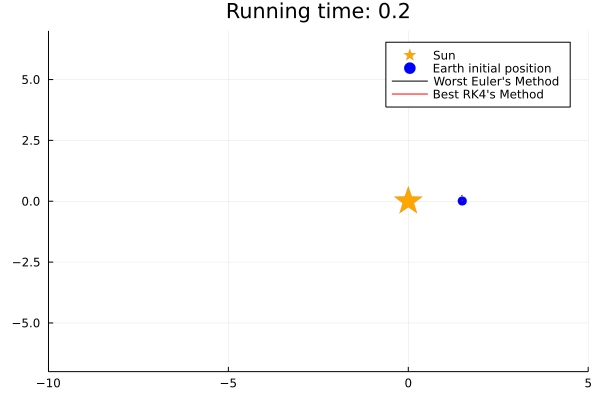

In [21]:
h = 0.01
t_worst, u_worst = eulers_method(h, u, t_max)
t_best, u_best = RK4(h, u, t_max)

x_worst = state_x.(u_worst)
y_worst = state_y.(u_worst)

x_best = state_x.(u_best)
y_best = state_y.(u_best)

# Uncomment below to create the gif
# p = plot(xlim = (-10, 5), ylim = (-7, 7))
# scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
# scatter!([x_worst[1]], [y_worst[1]], ms=5, msw=0, c=:blue, shape=:circle, label="Earth initial position")
# plot!(x_worst[1:2], y_worst[1:2], label="Worst Euler's Method", color=:black, title="Running time: 0.0")
# plot!(x_best[1:2], y_best[1:2], label="Best RK4's Method", color=:red)

# anim = @animate for i in 6:5:5000
#     plot!(x_worst[i:i+1], y_worst[i:i+1], label="", color=:black, title="Running time: $(t_worst[i])")
#     plot!(x_best[i:i+1], y_best[i:i+1], label="", color=:red)
# end

# gif(anim, "graph.gif", fps=60)

# Solution to [Question 16](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q16)

#### 16a:

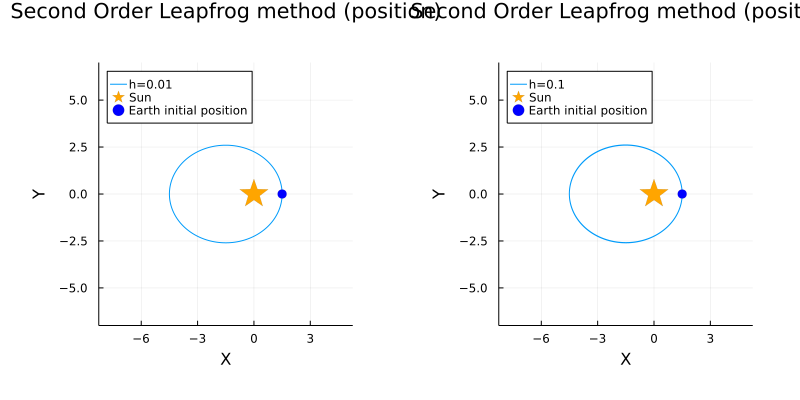

In [5]:
function second_order_leapfrog(h,init,x)

    t_array = 1:h:200
    u_array = [Vector{Float64}(undef,4) for _ in 1:length(t_array) ]
    u_array[1] = init
    for i in 1:(length(t_array)-1)
        v_intermediate = u_array[i][1:2] + (h/2)*df_dt_one_body(u_array[i])[1:2]
        u_array[i+1][3:4] = u_array[i][3:4] + h*v_intermediate
        u_array[i+1][1:2] = v_intermediate + (h/2)*df_dt_one_body(u_array[i+1])[1:2]
    end
#return u_array
return x(t_array, u_array, title = "Second Order Leapfrog method", label = "h=$h")
end

p1 = second_order_leapfrog(0.01, [0.0, 1.0, 1.5, 0.0], plot_solution_position)
p2 =second_order_leapfrog(0.1, [0.0, 1.0, 1.5, 0.0], plot_solution_position)
p3 = second_order_leapfrog(0.5, [0.0, 1.0, 1.5, 0.0], plot_solution_position)

plot(p1,p2)

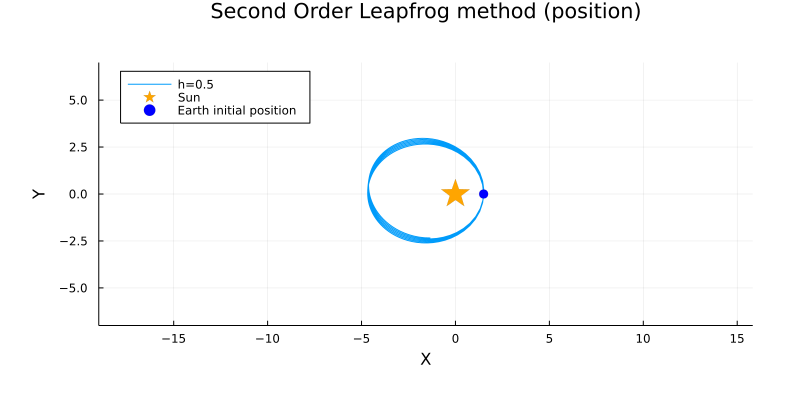

In [7]:
plot(p3)

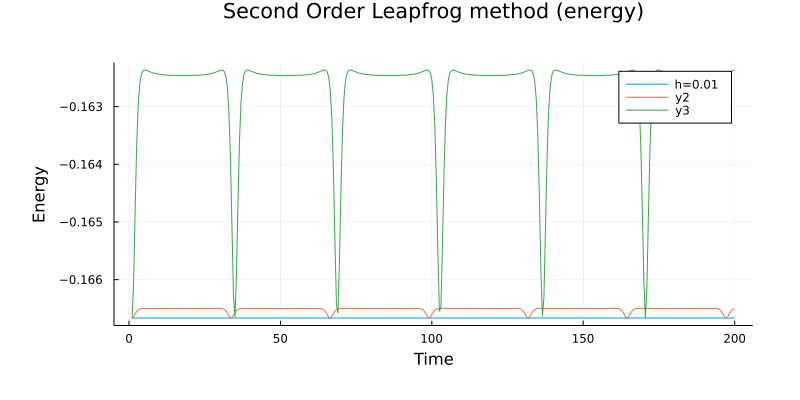

In [8]:
p4 = second_order_leapfrog(0.01, [0.0, 1.0, 1.5, 0.0], plot_solution_energy) #can't get them on the same plot
p5 = second_order_leapfrog(0.1, [0.0, 1.0, 1.5, 0.0], plot_solution_energy)
p6 = second_order_leapfrog(0.5, [0.0, 1.0, 1.5, 0.0], plot_solution_energy)

p7 = plot!(p4, p5[1][1][:x], p5[1][1][:y])
plot!(p7, p6[1][1][:x], p6[1][1][:y])

#### 16b:

Eulers methods has 13 floating point operations per time step, RK4 has 63 floating point operations, and leapfrog method has 32 floating point operations. Given RK4 has the greatest number of floating point operations it wil have the longest computation time and have the greatest computational effort.

#### 16c:

The accuracy of second order leapfrog method gets worse as the time horizons get bigger as can be seen in the plots below.

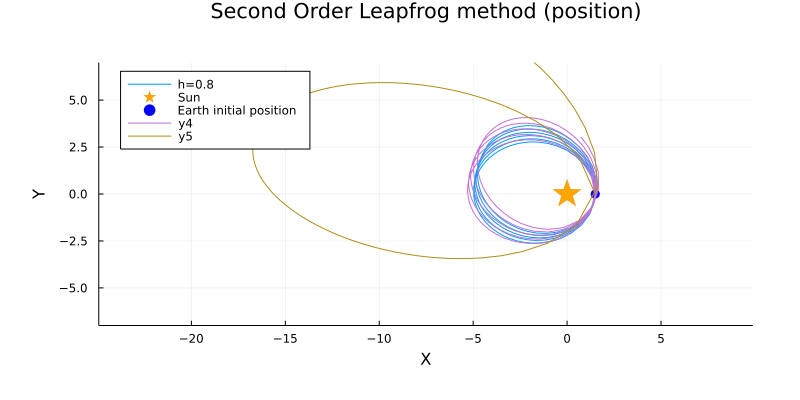

In [6]:
p1 = second_order_leapfrog(0.8, [0.0, 1.0, 1.5, 0.0], plot_solution_position)
p2 = second_order_leapfrog(1, [0.0, 1.0, 1.5, 0.0], plot_solution_position)
p3 = second_order_leapfrog(2, [0.0, 1.0, 1.5, 0.0], plot_solution_position)

p4 = plot!(p1, p2[1][1][:x], p2[1][1][:y])
plot!(p4, p3[1][1][:x], p3[1][1][:y])

#### 16d:

In [ ]:
function one_body(du,u,p,t)
    M = 1
    G = 1
    r = sqrt(u[3]^2 + u[4]^2)
    du[1] = -(M*G*u[3])/(r^3)
    du[2] = -(M*G*u[4])/(r^3)
    du[3] = u[1]
    du[4] = u[2]
   end

   function one_body_velocity(dv,v,u,p,t)
    M = 1
    G = 1
    r = sqrt(u[1]^2 + u[2]^2)
     dv[1] = -(M*G)/(r^3)
     dv[2] = -(M*G)/(r^3)
end

function one_body_position(du,v,u,p,t)
 du[1] = v[1]
 du[2] = v[2]
end



   u_0 = [0.0,1.0,1.5,0.0];
   t = (0.0,200.0);
   problem1 = ODEProblem(one_body,u_0,t)
   problem2 = DynamicalODEProblem(one_body_velocity, one_body_position,u_0[1:2], u_0[3:4],t)
   sol1 = solve(problem1)
   sol2 = solve(prob, McAte4(), dt = 0.5)

: 

The results from the ODE solver varied from the leapfrog calculation, as the final u was [-0.23363280590852373, -0.3129044883998944, -3.698544080293097, 1.415557766253938], whereas leapfrogs final u was [-0.6664179538859297, 0.3503152446258345, 0.056579689064156266, 2.2210975315919828]. The sympletic integrator got a final u of [-0.9297439793018146, 0.07025602069818619], [-182.09213291168538, 16.40786708831432]. There is quite a bit of variation between all these results however given the very different methods and size of the steps/uarrays it is resonable.

# Solution to [Question 17](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q17)

Dr. Amy Chan finished her undergraduate degree in 2009 on real analysis and image analysis, and her honours in 2010 on real analysis and topology optimisation. She completed her PhD with CSIRO & UQ in image analysis and statistics in 2018 where she conducted image segmentation of brain MRIs using mixture models & parameter estimation. Statistics was a new interest for Amy when she started her PhD, but after obtaining it, she started working as a statistician at Polymathian. Over the years, her role at Polymathian varied and she has taken on the roles of a software developer/consultant, and now a manager who works in all three roles.

Polymathian utilises mathematics and software to solve complex business problems in many industries including mining, rail, and energy. Amy discussed many of the relevant tools and programming languages she has used in industry, including Git, WSL/Unix, Docker, Python, React/JS, and more. It was interesting to see that I had come across many of the tools that she has used in industry, both in the university courses I've taken (MATH2504 and various computer science courses) and also in my personal projects.

Amy gave some valuable advice throughout her seminar. One piece of advice that stood out to me was about presenting statistics and results to clients. Amy had to manage different language barriers between colleagues and clients, and stated the importance of, at times, forging mathematical explanations in favour of more accessible ones - being able to communicate an idea or concept to someone else effectively, regardless of their experience or knowledge in the field, was more important.